In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:

sdf = pd.read_csv('/content/fear_greed_index.csv')
tdf = pd.read_csv('/content/historical_data.csv')


In [55]:

sdf['date'] = pd.to_datetime(sdf['date']).dt.date
tdf['trade_date'] = pd.to_datetime(tdf['Timestamp IST'], format='%d-%m-%Y %H:%M').dt.date

In [4]:

mdf = pd.merge(tdf, sdf, left_on='trade_date', right_on='date', how='left')


In [78]:
mdf.head(2)

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,...,Order ID,Crossed,Fee,Trade ID,Timestamp,trade_date,timestamp,value,classification,date
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-02-12 22:50:00,0.000000,Buy,0.0,...,5.201771e+10,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02,1.733117e+09,80.0,Extreme Greed,2024-02-12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-02-12 22:50:00,986.524596,Buy,0.0,...,5.201771e+10,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02,1.733117e+09,80.0,Extreme Greed,2024-02-12


In [57]:
print(mdf.info())
print(mdf[['trade_date', 'classification']].head())
print("Unmatched rows:", mdf['classification'].isnull().sum())


<class 'pandas.core.frame.DataFrame'>
Index: 153894 entries, 0 to 153899
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Account           153894 non-null  object        
 1   Coin              153894 non-null  object        
 2   Execution Price   153894 non-null  float64       
 3   Size Tokens       153894 non-null  float64       
 4   Size USD          153894 non-null  float64       
 5   Side              153894 non-null  object        
 6   Timestamp IST     61664 non-null   datetime64[ns]
 7   Start Position    153894 non-null  float64       
 8   Direction         153894 non-null  object        
 9   Closed PnL        153894 non-null  float64       
 10  Transaction Hash  153893 non-null  object        
 11  Order ID          153893 non-null  float64       
 12  Crossed           153893 non-null  object        
 13  Fee               153893 non-null  float64       
 14  Trade ID 

In [58]:
missing_sentiment_rows = mdf[mdf['classification'].isnull()]
missing_sentiment_rows[['Account', 'Timestamp IST', 'trade_date', 'Closed PnL','Size USD']]


,Account,Timestamp IST,trade_date,Closed PnL,Size USD


In [8]:
mdf = mdf[mdf['classification'].notnull()]
mdf.isnull().sum()

,0
Account,0
Coin,0
Execution Price,0
Size Tokens,0
Size USD,0
Side,0
Timestamp IST,0
Start Position,0
Direction,0
Closed PnL,0


In [59]:
x1=mdf.groupby('classification')['Closed PnL'].mean().reset_index().sort_values(by='Closed PnL', ascending=False)
x1.head()

,classification,Closed PnL
1,Extreme Greed,68.805973
2,Fear,64.032686
4,Neutral,46.822030
3,Greed,34.764988
0,Extreme Fear,32.565677


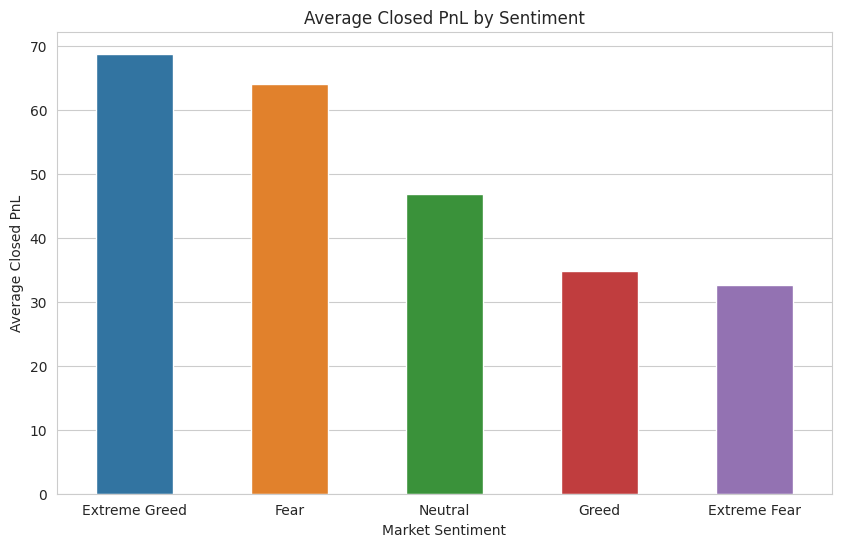

In [60]:
#making a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='classification', y='Closed PnL', data=x1,hue='classification',width=0.5)
plt.xlabel('Market Sentiment')
plt.ylabel('Average Closed PnL')
plt.title('Average Closed PnL by Sentiment')
plt.show()

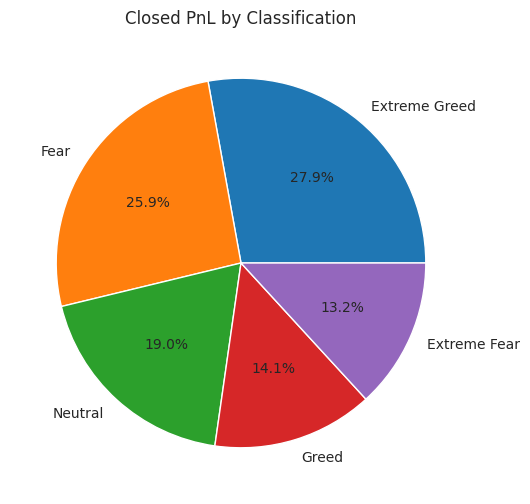

In [61]:
#making pie chart
plt.figure(figsize=(10, 6))
plt.pie(x1['Closed PnL'], labels=x1['classification'], autopct='%1.1f%%')
plt.title('Closed PnL by Classification')
plt.show()


In [62]:
x2=mdf.groupby(['classification', 'Side'])['Closed PnL'].mean().unstack().round(2)
x2.head(10)

Side,BUY,SELL
classification,,
Extreme Fear,37.60,26.38
Extreme Greed,12.11,117.86
Fear,79.76,48.82
Greed,9.10,61.31
Neutral,47.37,46.22


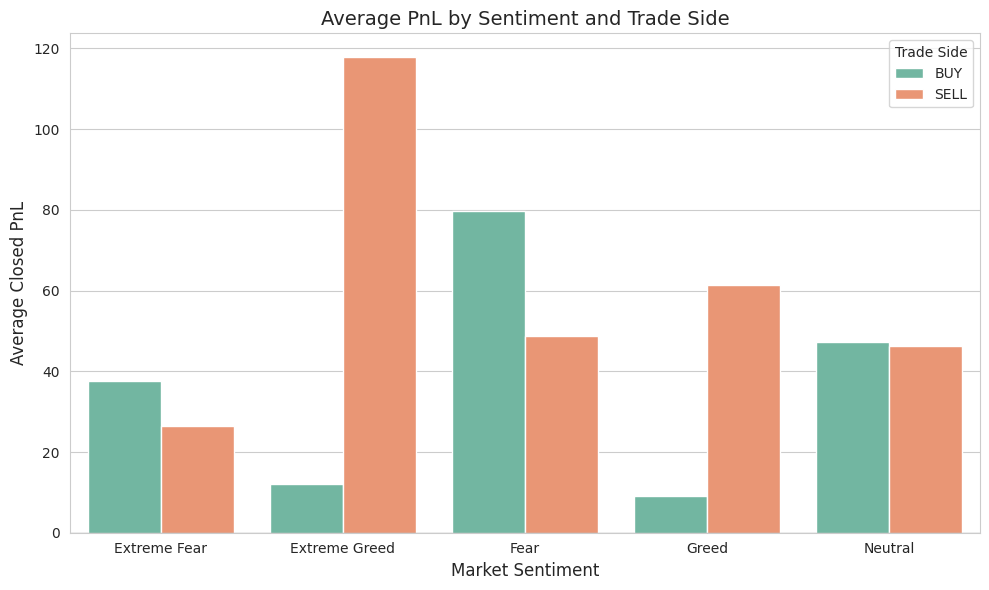

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt


plot_df = x2.reset_index().melt(
    id_vars='classification',
    value_vars=['BUY', 'SELL'],
    var_name='Trade Side',
    value_name='Average Closed PnL'
)

sns.set_style("whitegrid")


plt.figure(figsize=(10, 6))
barplot = sns.barplot(
    data=plot_df,
    x='classification',
    y='Average Closed PnL',
    hue='Trade Side',
    palette='Set2'
)

plt.title('Average PnL by Sentiment and Trade Side', fontsize=14)
plt.xlabel('Market Sentiment', fontsize=12)
plt.ylabel('Average Closed PnL', fontsize=12)
plt.axhline(0, color='black', linewidth=0.8)
plt.legend(title='Trade Side')
plt.tight_layout()

plt.show()



In [64]:
import plotly.express as px


plot_df = x2.reset_index().melt(
    id_vars='classification',
    value_vars=['BUY', 'SELL'],
    var_name='Trade Side',
    value_name='Average Closed PnL'
)

fig = px.bar(
    plot_df,
    x='classification',
    y='Average Closed PnL',
    color='Trade Side',
    barmode='group',
    title='Clustered Column Chart: Average Closed PnL by Sentiment and Trade Side',
    labels={'classification': 'Market Sentiment'}
)
fig.update_traces(width=0.3)
fig.update_layout(bargap=0.3)



fig.update_layout(
    xaxis_title='Market Sentiment',
    yaxis_title='Average Closed PnL',
    legend_title='Trade Side',
    bargap=0.2,
    plot_bgcolor='black',
    paper_bgcolor='black',
    font=dict(color='white')
)


fig.show()


Checking  if traders take more risk during Greed phases by increasing trade size.

In [65]:
x3=mdf.groupby('classification')['Size USD'].mean().sort_values(ascending=False).round(2).reset_index()
x3.head(5)

,classification,Size USD
0,Fear,9586.97
1,Greed,6227.25
2,Extreme Fear,6227.05
3,Neutral,5607.93
4,Extreme Greed,3216.87


In [66]:
traders_by_each_sentiment=mdf['classification'].value_counts().reset_index()
traders_by_each_sentiment

,classification,count
0,Fear,43608
1,Greed,39047
2,Extreme Greed,30921
3,Neutral,26856
4,Extreme Fear,13462


In [67]:
import plotly.express as px
import pandas as pd

# Assuming x3 is your DataFrame with sentiment data
# Group by sentiment to calculate average trade size
avg_trade_size_df = x3.groupby('classification')['Size USD'].mean().reset_index()

# Plot interactive bar chart
fig = px.bar(
    avg_trade_size_df,
    x='classification',
    y='Size USD',
    text='Size USD',
    title='📊 Average Trade Size by Market Sentiment',
    labels={'classification': 'Sentiment', 'Size USD': 'Avg Trade Size (USD)'},
    color='Size USD',
    color_continuous_scale='Viridis'
)
fig.update_traces(width=0.4)
fig.update_layout(bargap=0.4)


# Customize layout
fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')
fig.update_layout(
    xaxis_title='Market Sentiment',
    yaxis_title='Average Trade Size (USD)',
    uniformtext_minsize=8,
    uniformtext_mode='hide',
    bargap=0.3,
    plot_bgcolor='black',
    paper_bgcolor='black',
    font=dict(color='white')
)

# Show interactive chart
fig.show()


In [68]:
x4=mdf.groupby(['classification', 'Side'])['Closed PnL'].sum().unstack().round(2).reset_index()
x4

Side,classification,BUY,SELL
0,Extreme Fear,278987.33,159411.81
1,Extreme Greed,173711.93,1953837.55
2,Fear,1709971.44,1082365.95
3,Greed,180703.79,1176764.69
4,Neutral,666727.61,590724.82


Combine both sentiment and direction to see where the real money is made.

In [69]:
import plotly.express as px

total_pnl_df = mdf.groupby(['classification', 'Side'])['Closed PnL'].sum().reset_index()


fig = px.bar(
    total_pnl_df,
    x='classification',
    y='Closed PnL',
    color='Side',
    barmode='group',
    title='Total Closed PnL by Sentiment and Trade Side',
    labels={'classification': 'Market Sentiment'}
)

fig.update_layout(
    plot_bgcolor='navy',
    paper_bgcolor='black',
    font=dict(color='white'),
    bargap=0.3
)

fig.show()


In [73]:
mdf['date'] = pd.to_datetime(mdf['Timestamp IST'], format='%d-%m-%Y %H:%M').dt.date
daily_pnl = mdf.groupby('date')['Closed PnL'].sum().reset_index()
import plotly.express as px

fig = px.line(
    daily_pnl,
    x='date',
    y='Closed PnL',
    title='Daily Net PnL Trend Over Time',
    labels={'date': 'Date', 'Closed PnL': 'Net PnL'},
    markers=True
)

fig.update_layout(
    xaxis_title='Date',
    yaxis_title='Net Profit/Loss',
    plot_bgcolor='black',
    paper_bgcolor='black',
    font=dict(color='white')
)

fig.show()

In [74]:
!pip install dash


In [75]:
from jupyter_dash import JupyterDash
from dash import html, dcc, Input, Output
import pandas as pd

# Ensure date format
mdf['Timestamp IST'] = pd.to_datetime(mdf['Timestamp IST'], errors='coerce')
mdf['date'] = mdf['Timestamp IST'].dt.date

# Daily dropdown options
unique_dates = sorted(mdf['date'].dropna().unique())

# App init
app = JupyterDash(__name__)
app.title = "Compact Trade Summary"

app.layout = html.Div(style={'fontFamily': 'Arial', 'backgroundColor': '#111', 'color': 'white', 'padding': '20px'}, children=[
    html.H2("📋 Daily Trade Summary", style={'textAlign': 'center'}),

    html.Label("Select a Date:", style={'fontSize': '16px'}),
    dcc.Dropdown(
        id='date-picker',
        options=[{'label': str(d), 'value': str(d)} for d in unique_dates],
        value=str(unique_dates[-1]),
        style={'width': '50%', 'color': '#000'}
    ),

    html.Div(id='summary-output', style={'marginTop': '30px', 'fontSize': '16px', 'whiteSpace': 'pre-line'})
])

@app.callback(
    Output('summary-output', 'children'),
    Input('date-picker', 'value')
)
def update_summary(selected_date):
    selected_date = pd.to_datetime(selected_date).date()
    df = mdf[mdf['date'] == selected_date]

    if df.empty:
        return f"No trades found on {selected_date}."

    # Get summary metrics
    sentiment = df['classification'].mode()[0]
    total_trades = len(df)
    net_pnl = df['Closed PnL'].sum()
    buy_pnl = df[df['Side'] == 'BUY']['Closed PnL'].sum()
    sell_pnl = df[df['Side'] == 'SELL']['Closed PnL'].sum()
    total_volume = df['Size USD'].sum()

    # Build summary string
    summary = f"""
📅 Date: {selected_date}
🧠 Sentiment: {sentiment}
📊 Total Trades: {total_trades}
💼 Total Volume (USD): ${total_volume:,.2f}
💰 Net PnL: ${net_pnl:,.2f}

Side Breakdown:
   🔼 BUY  PnL: ${buy_pnl:,.2f}
   🔽 SELL PnL: ${sell_pnl:,.2f}
    """

    return summary

app.run(mode='inline', debug=True)


<IPython.core.display.Javascript object>

In [76]:
from jupyter_dash import JupyterDash
from dash import html, dcc, Input, Output
import pandas as pd

# Prep data
mdf['Timestamp IST'] = pd.to_datetime(mdf['Timestamp IST'], errors='coerce')
mdf['date'] = mdf['Timestamp IST'].dt.date
unique_dates = sorted(mdf['date'].dropna().unique())

# App init
app = JupyterDash(__name__)
app.title = "Detailed Trade Summary"

app.layout = html.Div(style={'fontFamily': 'Arial', 'backgroundColor': '#111', 'color': 'white', 'padding': '20px'}, children=[
    html.H2("📋 Daily Trade Summary", style={'textAlign': 'center'}),

    html.Label("Select a Date:", style={'fontSize': '16px'}),
    dcc.Dropdown(
        id='date-picker',
        options=[{'label': str(d), 'value': str(d)} for d in unique_dates],
        value=str(unique_dates[-1]),
        style={'width': '50%', 'color': '#000'}
    ),

    html.Div(id='summary-output', style={'marginTop': '30px', 'fontSize': '16px', 'whiteSpace': 'pre-line'})
])

@app.callback(
    Output('summary-output', 'children'),
    Input('date-picker', 'value')
)
def update_summary(selected_date):
    selected_date = pd.to_datetime(selected_date).date()
    df = mdf[mdf['date'] == selected_date]

    if df.empty:
        return f"No trades found on {selected_date}."

    # Extract metrics
    sentiment = df['classification'].mode()[0]
    total_trades = len(df)
    net_pnl = df['Closed PnL'].sum()
    buy_pnl = df[df['Side'] == 'BUY']['Closed PnL'].sum()
    sell_pnl = df[df['Side'] == 'SELL']['Closed PnL'].sum()
    total_volume = df['Size USD'].sum()
    unique_accounts = df['Account'].nunique()
    most_traded_coin = df['Coin'].mode()[0] if not df['Coin'].isna().all() else "N/A"
    total_fee = df['Fee'].sum()

    # Compact summary
    summary = f"""
📅 Date: {selected_date}
🧠 Sentiment: {sentiment}
👤 Unique Accounts: {unique_accounts}
🪙 Most Traded Coin: {most_traded_coin}

📊 Total Trades: {total_trades}
💼 Total Volume (USD): ${total_volume:,.2f}
💰 Net PnL: ${net_pnl:,.2f}
💸 Total Fee Paid: ${total_fee:,.4f}

Side Breakdown:
   🔼 BUY  PnL: ${buy_pnl:,.2f}
   🔽 SELL PnL: ${sell_pnl:,.2f}
    """
    return summary

# Run in notebook
app.run(mode='inline', debug=True)


<IPython.core.display.Javascript object>

In [79]:
import pandas as pd

# Ensure no missing data in important fields
df = mdf.dropna(subset=['Account', 'classification', 'Closed PnL', 'Size USD'])

# Group by Account and Sentiment
performance_df = df.groupby(['Account', 'classification']).agg(
    total_trades=('Closed PnL', 'count'),
    net_pnl=('Closed PnL', 'sum'),
    avg_pnl=('Closed PnL', 'mean'),
    total_volume=('Size USD', 'sum')
).reset_index()

# Calculate ROI (%)
performance_df['roi_percent'] = (performance_df['net_pnl'] / performance_df['total_volume']) * 100

# Round for readability
performance_df = performance_df.round({
    'net_pnl': 2,
    'avg_pnl': 2,
    'total_volume': 2,
    'roi_percent': 2
})

# Show top sample
performance_df.head(10)


,Account,classification,total_trades,net_pnl,avg_pnl,total_volume,roi_percent
0,0x083384f897ee0f19899168e3b1bec365f52a9012,Extreme Fear,100,124769.22,1247.69,1507100.86,8.28
1,0x083384f897ee0f19899168e3b1bec365f52a9012,Extreme Greed,945,-40282.34,-42.63,11415855.67,-0.35
2,0x083384f897ee0f19899168e3b1bec365f52a9012,Fear,1778,1113373.55,626.19,30262439.89,3.68
3,0x083384f897ee0f19899168e3b1bec365f52a9012,Greed,574,276719.27,482.09,8686990.84,3.19
4,0x083384f897ee0f19899168e3b1bec365f52a9012,Neutral,421,125650.12,298.46,9824876.71,1.28
5,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,Extreme Fear,170,-4235.15,-24.91,366532.65,-1.16
6,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,Extreme Greed,825,35658.89,43.22,1523508.30,2.34
7,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,Fear,2622,-1658.74,-0.63,2573742.54,-0.06
8,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,Greed,2943,30053.40,10.21,6487032.05,0.46
9,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,Neutral,720,-11933.08,-16.57,1084672.12,-1.10


<Axes: xlabel='roi_percent', ylabel='Account'>

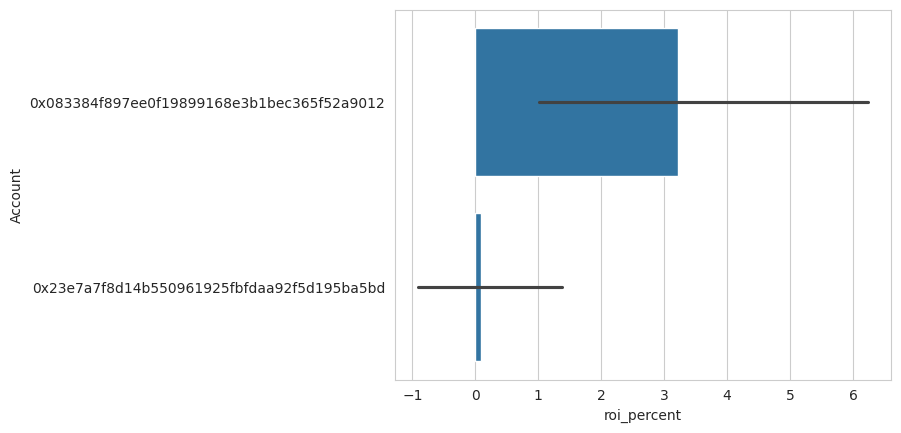

In [91]:
sns.barplot( x='roi_percent',y='Account', data=performance_df.head(10))

<Axes: xlabel='roi_percent', ylabel='Account'>

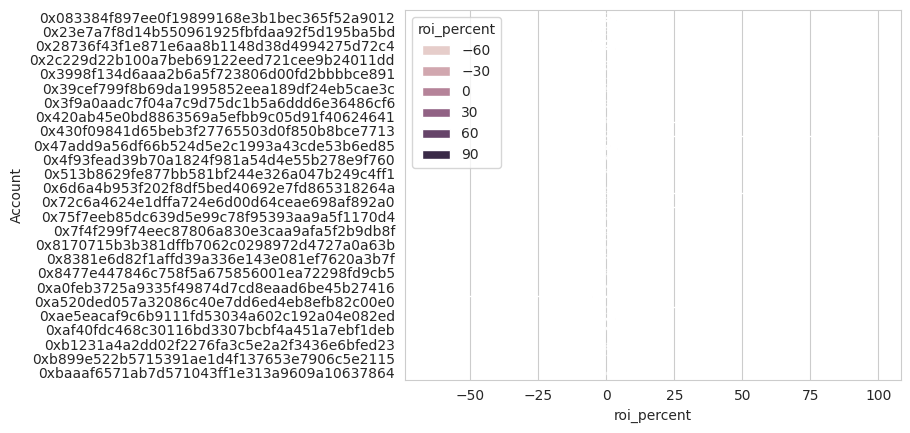

In [89]:
sns.barplot(data=performance_df, x='roi_percent', y='Account', hue='roi_percent', orient='h')

In [90]:
# Step 2: Pivot data to make each sentiment a column
pivot = performance_df.pivot(index='Account', columns='classification', values='net_pnl').fillna(0)

# Define regimes
greed_sentiments = ['Greed', 'Extreme Greed']
fear_sentiments = ['Fear', 'Extreme Fear']

def classify_trader(row):
    greed_pnl = sum([row.get(s, 0) for s in greed_sentiments])
    fear_pnl = sum([row.get(s, 0) for s in fear_sentiments])
    all_positive = sum([1 for val in row if val > 0])

    if all_positive >= 3:
        return 'Adaptive'
    elif greed_pnl > 0 and fear_pnl <= 0:
        return 'Trend Follower'
    elif fear_pnl > 0 and greed_pnl <= 0:
        return 'Contrarian'
    else:
        return 'Unclassified'

# Apply classification
pivot['trader_type'] = pivot.apply(classify_trader, axis=1)

# Final output
classified_traders = pivot.reset_index()[['Account', 'trader_type']]
classified_traders.head(10)


classification,Account,trader_type
0,0x083384f897ee0f19899168e3b1bec365f52a9012,Adaptive
1,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,Trend Follower
2,0x28736f43f1e871e6aa8b1148d38d4994275d72c4,Adaptive
3,0x2c229d22b100a7beb69122eed721cee9b24011dd,Adaptive
4,0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891,Trend Follower
5,0x39cef799f8b69da1995852eea189df24eb5cae3c,Adaptive
6,0x3f9a0aadc7f04a7c9d75dc1b5a6ddd6e36486cf6,Adaptive
7,0x420ab45e0bd8863569a5efbb9c05d91f40624641,Adaptive
8,0x430f09841d65beb3f27765503d0f850b8bce7713,Adaptive
9,0x47add9a56df66b524d5e2c1993a43cde53b6ed85,Adaptive


In [92]:
from dash import dash_table

# Setup dropdown options
sentiments = sorted(performance_df['classification'].unique())
types = sorted(classified_traders['trader_type'].unique())

app = JupyterDash(__name__)
app.title = "Trader Performance Summary"

app.layout = html.Div(style={'fontFamily': 'Arial', 'padding': '20px'}, children=[
    html.H2("📊 Trader Summary Dashboard"),

    html.H4("Module 1: Select Sentiment"),
    dcc.Dropdown(id='sentiment-picker',
                 options=[{'label': s, 'value': s} for s in sentiments],
                 value='Greed',
                 style={'width': '50%'}),

    html.Br(),

    html.Div(id='performance-output'),

    html.Hr(),

    html.H4("Module 2: Select Trader Type"),
    dcc.Dropdown(id='type-picker',
                 options=[{'label': t, 'value': t} for t in types],
                 value='Adaptive',
                 style={'width': '50%'}),

    html.Br(),

    html.Div(id='type-output')
])
@app.callback(
    Output('performance-output', 'children'),
    Input('sentiment-picker', 'value')
)
def show_sentiment_summary(sentiment):
    subset = performance_df[performance_df['classification'] == sentiment].sort_values(by='net_pnl', ascending=False).head(10)
    return dash_table.DataTable(
        columns=[{"name": i, "id": i} for i in subset.columns],
        data=subset.to_dict('records'),
        style_table={'overflowX': 'auto'},
        style_cell={'textAlign': 'left'},
        page_size=10
    )

@app.callback(
    Output('type-output', 'children'),
    Input('type-picker', 'value')
)
def show_type_summary(selected_type):
    trader_subset = classified_traders[classified_traders['trader_type'] == selected_type]
    return dash_table.DataTable(
        columns=[{"name": i, "id": i} for i in trader_subset.columns],
        data=trader_subset.to_dict('records'),
        style_table={'overflowX': 'auto'},
        style_cell={'textAlign': 'left'},
        page_size=10
    )
app.run(mode='inline', debug=True)



<IPython.core.display.Javascript object>